In [1]:
##
using ForneyLab
using ProgressMeter
include("agent/agent_0.jl")

act (generic function with 1 method)

In [2]:
init_estimator()

freeEnergyE (generic function with 1 method)

In [3]:
init_actor()

freeEnergyA (generic function with 1 method)

In [4]:
action = 10.0
marginals_estimate = Dict()
marginals_act = Dict()
prior = [0.0, 0.001]
ω̂ = 0.0
response = 0.0
actions = []
@showprogress for i in 1:100
    marginals_act, fe_act = act(action, feedback=response, prior=prior, vmp_iter=100);
    prediction = ForneyLab.unsafeMeanCov(marginals_act[:un])
    marginals_estimate, fe_estimate = estimate(1, prediction=prediction, target=1.0, vmp_iter=100);
    action = ForneyLab.sample(marginals_estimate[:ω_1])
    prior = ForneyLab.unsafeMeanCov(marginals_estimate[:u_0])
    response = sqrt(action^2 - ω̂^2) < 0.1 ? 1.0 : 0.0
    push!(actions, ForneyLab.unsafeMeanCov(marginals_estimate[:ω_1]))
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:51


In [5]:
mω = [x[1] for x in actions]; vω = [x[2] for x in actions];

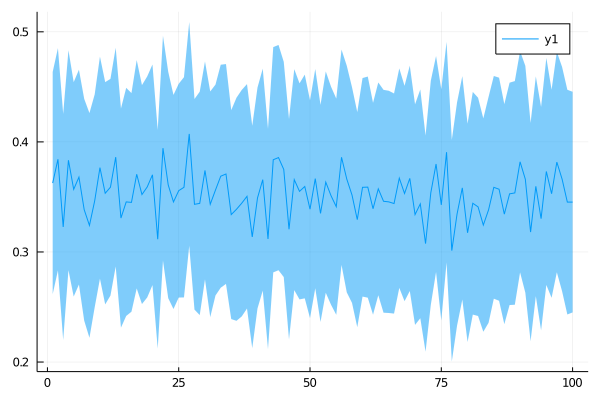

In [6]:
using Plots
plot(mω, ribbon=sqrt.(vω))